In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [ ]:
#Importado as extenções que serão necessárias para a execução da análise

In [2]:
data=pd.read_excel('titanic3.xls')

In [ ]:
#Realizada a leitura da base de dados pelo Jupyter Notebook

In [3]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
#Vizualização do cabeçalho da base de dados para análise

In [4]:
data = data[['pclass','survived', 'sex','embarked']]

In [ ]:
#Colunas consideradas relevantes que serão utilizadas na análise

In [5]:
data.head()

,pclass,survived,sex,embarked
0,1,1,female,S
1,1,1,male,S
2,1,0,female,S
3,1,0,male,S
4,1,0,female,S


In [6]:
data.describe()

,pclass,survived
count,1309.000000,1309.000000
mean,2.294882,0.381971
std,0.837836,0.486055
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pclass    1309 non-null   int64 
 1   survived  1309 non-null   int64 
 2   sex       1309 non-null   object
 3   embarked  1307 non-null   object
dtypes: int64(2), object(2)
memory usage: 41.0+ KB


In [8]:
data.isnull().sum()

pclass      0
survived    0
sex         0
embarked    2
dtype: int64

In [ ]:
#Comandos para a melhor vizualização da base de dados e compreender as caracteristicas dos campos

<Axes: ylabel='count'>

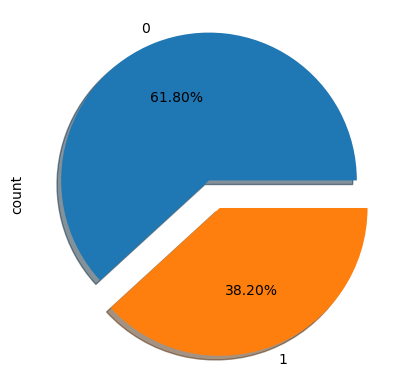

In [9]:
data['survived'].value_counts().plot.pie(explode=[0.1, 0.1], shadow=True, autopct='%1.2f%%')

In [ ]:
#Gráfico gerado para melhor vizualização dos dados contidos na coluna 'survived'.
#Podemos vizualizar aqui que apenas 38.2% dos dados apresentam a característica booleana maior, informando que aquela linha consta como positivo, ou seja, sobreviveu.

<Axes: ylabel='count'>

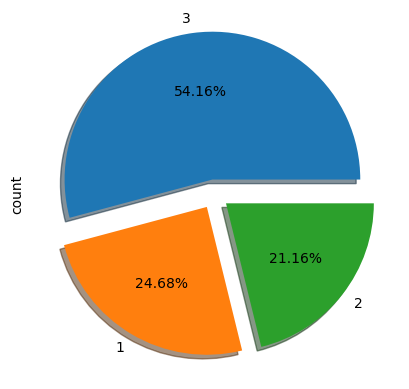

In [17]:
data['pclass'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], shadow=True, autopct='%1.2f%%')

In [18]:
#Gráfico gerado para melhor vizualização dos dados contidos na coluna 'pclass'.
#Aqui podemos vizualizar que mais da metade dos passageiros do Titanic eram da terceira classe.

In [10]:
dataSurvived = data[data['survived'] == 1]

In [ ]:
#Vamos trabalhar com os dados dos sobreviventes(survived), por isso vamos isolar essa informação cirando outra base de dados contendo somente as informações dos sobreviventes.

In [11]:
dataSurvived.head()

,pclass,survived,sex,embarked
0,1,1,female,S
1,1,1,male,S
5,1,1,male,S
6,1,1,female,S
8,1,1,female,S


In [ ]:
#Vizualizando a base gerada para verificação.

<Axes: ylabel='count'>

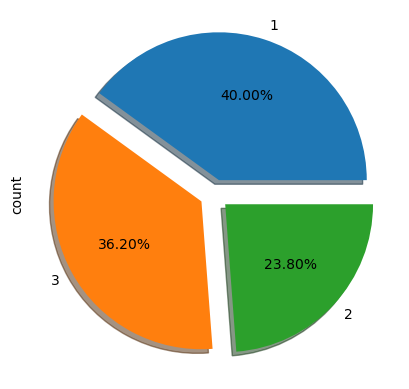

In [12]:
dataSurvived['pclass'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], shadow=True, autopct='%1.2f%%')

In [ ]:
#Podemos vizualizar aqui que, ainda que a terceira classe à bordo fosse a mais populosa, ela foi a segunda classe em mais sobreviveu, 

<Axes: xlabel='pclass', ylabel='count'>

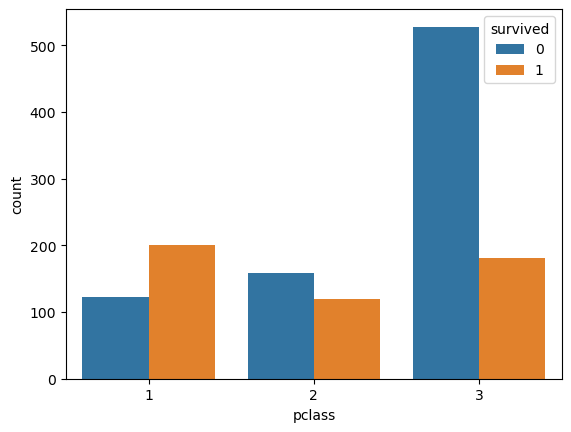

In [30]:
sns.countplot(data, x="pclass", hue="survived")

In [ ]:
#Esse gráfico demonstra bem a discrepância das proporções de pessoas que sobreviveram e morreram em relação à classe em que estavam alocadas.